In [138]:
import seaborn as sns
from statannot import add_stat_annotation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
sns.set(style='white',font_scale=1.5,)


In [139]:
from statsmodels.discrete.discrete_model import Logit
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

In [140]:
import numpy as np
from sklearn.model_selection import LeaveOneOut


In [141]:
df = pd.read_excel('./tumor vs normal.xlsx')

In [142]:
df = df.set_index('PID')

In [143]:
set1 =  ['Her2', 'ER', 'PR', 'SCRIB', 'WASF3']
set2 =  ['Her2-SHC', 'Her2-GRB2',
       'ER-GATA3', 'ER-FOXA1', 'PR-TIF2', 'PR-SRC-1', 'SCRIB-VANGL1',
       'SCRIB-NOS1AP', 'WASF3-CYFIP1', 'WASF3-NCKAP1',]
set3 =  ['Her2-GRB2-SHC',
       'ER-GATA3-FOXA1', 'PR-TIF2-SRC-1', 'SCRIB-VANGL1-NOS1AP',
       'WASF3-CYFIP1-NCKAP1']

# 1-mer的结果

# logistic regression

In [144]:
y = df['Group']
X = df[set1]
Y = y

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)


res = []
for train_index, test_index in loo.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = linear_model.LogisticRegression(C=2)
    model.fit(X_train, y_train)
 
    y_true = y_test.to_frame()
    y_true['Predicted probablity'] = model.predict_proba(X_test)[:,1]
    res.append(y_true)
    
data = pd.concat(res)[['Predicted probablity']]
data = X.mean(axis = 1).to_frame(name = 'Average intensity').join(data)
data['Group'] = y

LeaveOneOut()


# 准确率

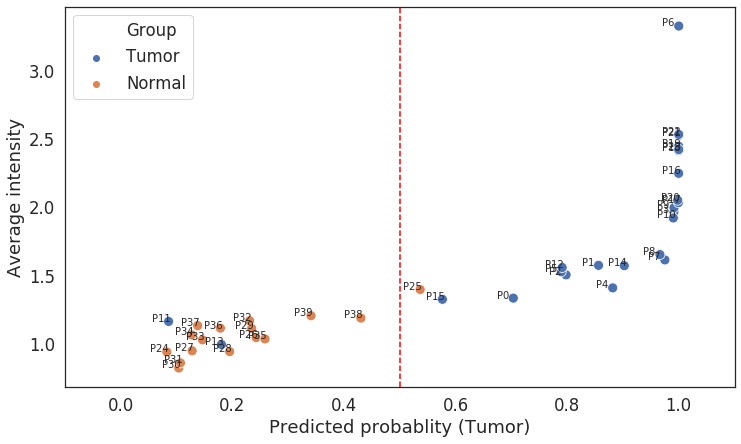

In [145]:
fig, ax = plt.subplots(figsize= (12,7))

g =sns.scatterplot(x = 'Predicted value for covid-19 severity', y = 'Average molecule intensity', s= 100,
                   hue = 'Group', ax= ax, data=data)

ax.set_xlabel('Predicted probablity (Tumor)')
ax.set_xlim(-0.1,1.1)

ax.axvline(x=0.5, ls = '--', color= 'red')

for i in range(len(data)):
    d = data.iloc[i]
    x = d['Predicted probablity']
    y1 = d['Average intensity']
    ax.text(x-0.03,y1, 'P%s' % i, fontsize=10)

## ROC

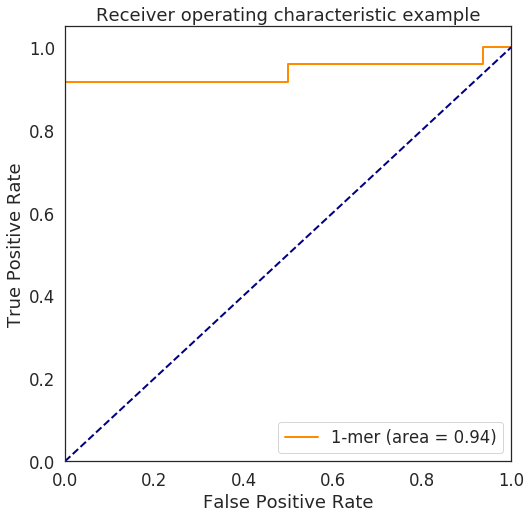

In [146]:
Y = y.map({'Tumor':1, 'Normal':0})
roc = roc_auc_score(Y, data['Predicted probablity'])
fpr, tpr, _ = roc_curve(Y, data['Predicted probablity'])

plt.figure(figsize= (8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='1-mer (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 导出数据

In [147]:
data.to_excel('./导出logistics回归-1mer.xlsx')

## 2-mer的结果

LeaveOneOut()


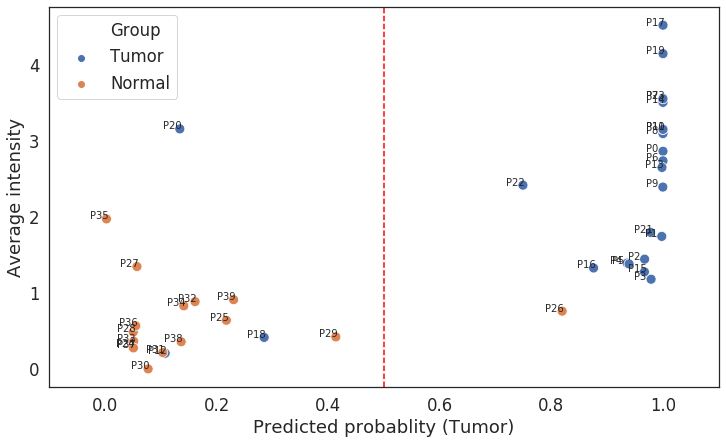

In [148]:
y = df['Group']
Y = y
X = df[set2]

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)


res = []
for train_index, test_index in loo.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = linear_model.LogisticRegression(C=2)
    model.fit(X_train, y_train)
   
    y_true = y_test.to_frame()
    y_true['Predicted probablity'] = model.predict_proba(X_test)[:,1]
    res.append(y_true)
    
data = pd.concat(res)[['Predicted probablity']]
data = X.mean(axis = 1).to_frame(name = 'Average intensity').join(data)
data['Group'] = y

fig, ax = plt.subplots(figsize= (12,7))

g =sns.scatterplot(x = 'Predicted probablity', y = 'Average intensity', s= 100,
                   hue = 'Group', ax= ax, data=data)

ax.set_xlabel('Predicted probablity (Tumor)')
ax.set_xlim(-0.1,1.1)

ax.axvline(x=0.5, ls = '--', color= 'red')

for i in range(len(data)):
    d = data.iloc[i]
    x = d['Predicted probablity']
    y1 = d['Average intensity']
    ax.text(x-0.03,y1, 'P%s' % i, fontsize=10)
 #ax.text(0.5,data['Average intensity'].max() - 0.05,)

data.to_excel('./导出logistics回归-2mer.xlsx')

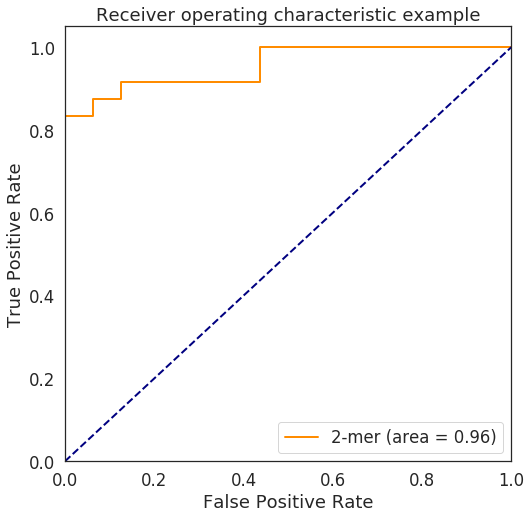

In [149]:
Y = y.map({'Tumor':1, 'Normal':0})
roc = roc_auc_score(Y, data['Predicted probablity'])
fpr, tpr, _ = roc_curve(Y, data['Predicted probablity'])

plt.figure(figsize= (8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='2-mer (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

 3-mer的结果

LeaveOneOut()


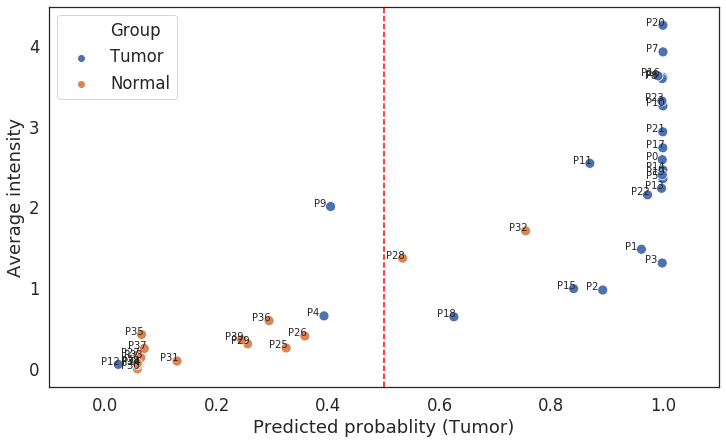

In [150]:
y = df['Group']
Y = y
X = df[set3]

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)


res = []
for train_index, test_index in loo.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = linear_model.LogisticRegression(C=2)
    model.fit(X_train, y_train)
   
    y_true = y_test.to_frame()
    y_true['Predicted probablity'] = model.predict_proba(X_test)[:,1]
    res.append(y_true)
    
data = pd.concat(res)[['Predicted probablity']]
data = X.mean(axis = 1).to_frame(name = 'Average intensity').join(data)
data['Group'] = y

fig, ax = plt.subplots(figsize= (12,7))

g =sns.scatterplot(x = 'Predicted probablity', y = 'Average intensity', s= 100,
                   hue = 'Group', ax= ax, data=data)

ax.set_xlabel('Predicted probablity (Tumor)')
ax.set_xlim(-0.1,1.1)

ax.axvline(x=0.5, ls = '--', color= 'red')

for i in range(len(data)):
    d = data.iloc[i]
    x = d['Predicted probablity']
    y1 = d['Average intensity']
    ax.text(x-0.03,y1, 'P%s' % i, fontsize=10)
 #ax.text(0.5,data['Average intensity'].max() - 0.05,)

data.to_excel('./导出logistics回归-3mer.xlsx')

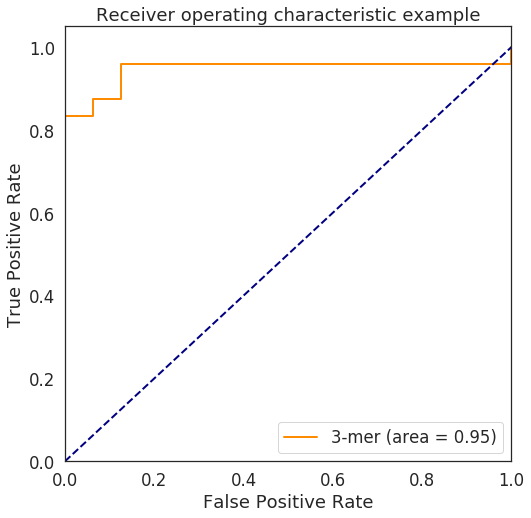

In [151]:
Y = y.map({'Tumor':1, 'Normal':0})
roc = roc_auc_score(Y, data['Predicted probablity'])
fpr, tpr, _ = roc_curve(Y, data['Predicted probablity'])

plt.figure(figsize= (8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='3-mer (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()